In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("Sales\Sales.csv",nrows=200000)

df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price
0,0,0,0,2022-04-01,Mumbai,112246974,173273802,17995199,1,234.0,0.0,344107,202.513030
1,1,1,1,2022-04-01,Bengaluru,112246976,173273597,18259433,1,64.0,0.0,389676,48.714375
2,2,2,2,2022-04-01,Bengaluru,112247019,173123717,5402601,1,1031.0,0.0,39411,975.996000
3,3,3,3,2022-04-01,HR-NCR,112247045,172547459,15649744,1,57.0,0.0,369742,25.000000
4,4,4,4,2022-04-01,Mumbai,112247123,173081820,10127605,2,30.0,0.0,12872,57.980004


In [5]:
df["unit_selling_price"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: unit_selling_price
Non-Null Count   Dtype  
--------------   -----  
200000 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


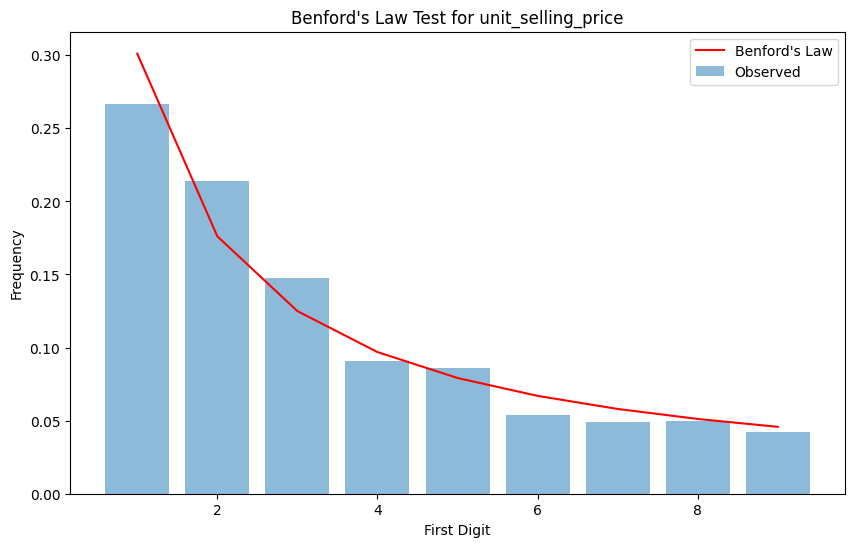

Benford's Law Test Results for unit_selling_price:
Chi-square statistic: 993425.3380639795
p-value: 0.0
Does not follow Benford's Law


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def load_data(file_path):
    return pd.read_csv(file_path)

def test_poisson_distribution(data, column_name):
    # Convert data to integers by rounding
    rounded_data = data[column_name].round().astype(int)
    observed = rounded_data.value_counts().sort_index()
    lambda_param = rounded_data.mean()
    
    # Create a range of values from 0 to the maximum observed value
    x = np.arange(0, max(observed.index) + 1)
    
    # Calculate expected frequencies
    expected = stats.poisson.pmf(x, lambda_param) * len(data)
    
    # Ensure observed and expected have the same index
    full_range = pd.Series(index=x, dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)
    
    # Perform chi-square test
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    
    plt.figure(figsize=(10, 6))
    plt.bar(observed.index, observed.values, alpha=0.5, label='Observed')
    plt.plot(x, expected, 'r-', label='Expected (Poisson)')
    plt.legend()
    plt.title(f"Poisson Distribution Test for {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
    print(f"Poisson Distribution Test Results for {column_name}:")
    print(f"Chi-square statistic: {chi_square}")
    print(f"p-value: {p_value}")
    print(f"{'Follows Poisson distribution' if p_value > 0.05 else 'Does not follow Poisson distribution'}")

def get_first_digit(value):
    try:
        # Convert to string and remove any leading characters before the first digit
        str_value = str(value).lstrip('+-').lstrip('0')
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(data, column_name):
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)
    
    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions
    
    # Ensure observed and expected have the same index
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)
    
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    
    plt.figure(figsize=(10, 6))
    plt.bar(observed.index, observed / total_valid, alpha=0.5, label='Observed')
    plt.plot(range(1, 10), expected_proportions, 'r-', label="Benford's Law")
    plt.legend()
    plt.title(f"Benford's Law Test for {column_name}")
    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.show()
    
    print(f"Benford's Law Test Results for {column_name}:")
    print(f"Chi-square statistic: {chi_square}")
    print(f"p-value: {p_value}")
    if p_value > 0.05:
        print(f"Follows Benford\'s Law")
    else:
        print("Does not follow Benford\'s Law")

def main():
    file_path = "Sales\Sales.csv"  # Replace with your CSV file path
    data = load_data(file_path)
    
    # Replace 'column_name' with the actual column name you want to test
    column_name = "unit_selling_price"
    
    # test_poisson_distribution(data, column_name)
    test_benfords_law(data, column_name)

if __name__ == "__main__":
    main()

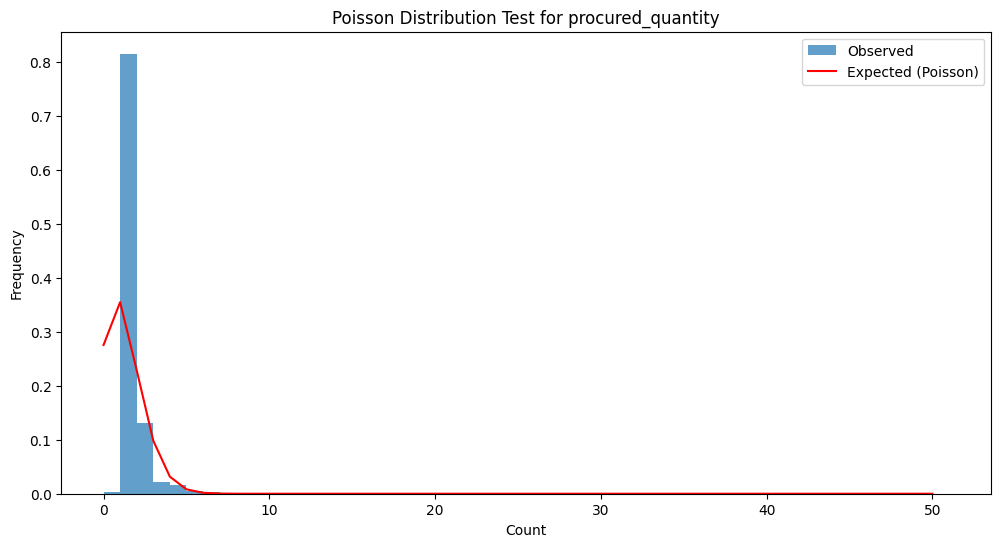

Poisson Distribution Test Results for procured_quantity:
Mean (lambda): 1.29
Variance: 0.85
Variance-to-Mean Ratio (VMR): 0.66
Chi-square statistic: 952064070337726711298458222114292711146857517548560187392.00
p-value: 0.0000
The data does not follow a Poisson distribution (p < 0.05)
This could indicate potential data anomalies or underdispersion.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def load_data(file_path):
    return pd.read_csv(file_path)

def clean_data(df):
    # Remove any potential duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]
    # Ensure 'procured_quantity' is numeric
    df['procured_quantity'] = pd.to_numeric(df['procured_quantity'], errors='coerce')
    return df

def test_poisson_distribution(data, column_name='procured_quantity'):
    # Ensure data is non-negative integers
    count_data = data[column_name].dropna().astype(int)
    count_data = count_data[count_data >= 0]
    
    # Calculate mean (lambda) of the data
    lambda_param = count_data.mean()
    
    # Calculate expected frequencies
    x = np.arange(0, max(count_data) + 1)
    expected = stats.poisson.pmf(x, lambda_param) * len(count_data)
    
    # Calculate observed frequencies
    observed = count_data.value_counts().sort_index()
    observed = observed.reindex(x, fill_value=0)
    
    # Perform chi-square test
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    
    # Calculate variance-to-mean ratio (VMR)
    vmr = count_data.var() / count_data.mean()
    
    # Plot histogram and expected Poisson distribution
    plt.figure(figsize=(12, 6))
    plt.hist(count_data, bins=range(0, max(count_data) + 2), density=True, alpha=0.7, label='Observed')
    plt.plot(x, stats.poisson.pmf(x, lambda_param), 'r-', label='Expected (Poisson)')
    plt.title(f"Poisson Distribution Test for {column_name}")
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    print(f"Poisson Distribution Test Results for {column_name}:")
    print(f"Mean (lambda): {lambda_param:.2f}")
    print(f"Variance: {count_data.var():.2f}")
    print(f"Variance-to-Mean Ratio (VMR): {vmr:.2f}")
    print(f"Chi-square statistic: {chi_square:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The data does not follow a Poisson distribution (p < 0.05)")
        if vmr < 0.9:
            print("WARNING: The variance is suspiciously low compared to the mean.")
            print("This could indicate potential data anomalies or underdispersion.")
        elif vmr > 1.1:
            print("The data shows overdispersion, which is common in real-world sales data.")
    else:
        print("The data follows a Poisson distribution (p >= 0.05)")
        if vmr < 0.9 or vmr > 1.1:
            print("However, the variance-to-mean ratio is not close to 1 as expected for a perfect Poisson distribution.")
            print("This could warrant further investigation of sales patterns.")

def main():
    file_path = "Sales\Sales.csv"  # Replace with your CSV file path
    data = load_data(file_path)
    data = clean_data(data)
    
    test_poisson_distribution(data)

if __name__ == "__main__":
    main()

#### USING MAD AND LOG NORMAL INSTEAD OF POISSION 

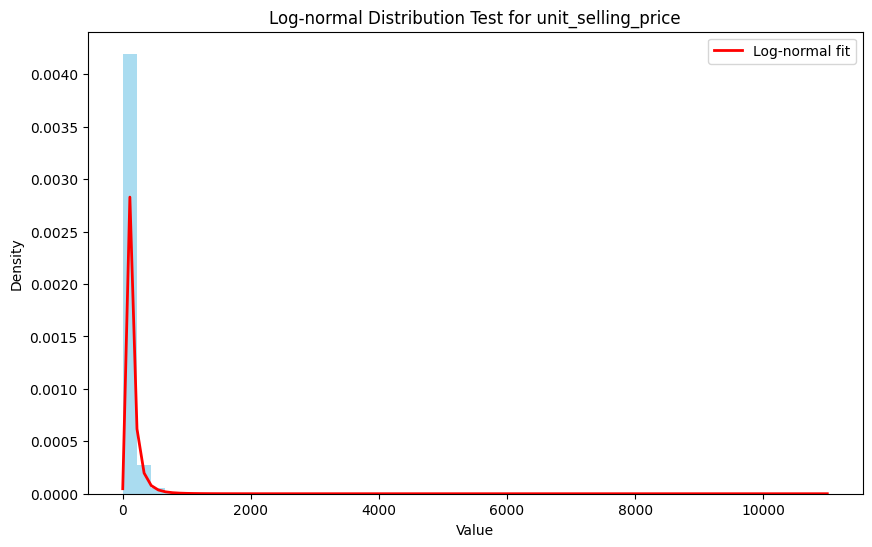

Log-normal Distribution Test Results for unit_selling_price:
KS statistic: 0.052589276466428914
p-value: 0.0
Does not follow log-normal distribution


AttributeError: module 'scipy.stats' has no attribute 'benford_distribution'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def load_data(file_path):
    return pd.read_csv(file_path)

def test_lognormal_distribution(data, column_name):
    # Remove zeros and negative values
    positive_data = data[data[column_name] > 0][column_name]
    
    # Fit log-normal distribution
    shape, loc, scale = stats.lognorm.fit(positive_data, floc=0)
    
    # Calculate KS test
    ks_statistic, p_value = stats.kstest(positive_data, 'lognorm', args=(shape, loc, scale))
    
    # Plot histogram and fitted distribution
    plt.figure(figsize=(10, 6))
    plt.hist(positive_data, bins=50, density=True, alpha=0.7, color='skyblue')
    
    x = np.linspace(positive_data.min(), positive_data.max(), 100)
    pdf = stats.lognorm.pdf(x, shape, loc, scale)
    plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
    
    plt.title(f"Log-normal Distribution Test for {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    print(f"Log-normal Distribution Test Results for {column_name}:")
    print(f"KS statistic: {ks_statistic}")
    print(f"p-value: {p_value}")
    print(f"{'Follows log-normal distribution' if p_value > 0.05 else 'Does not follow log-normal distribution'}")

def get_first_digit(value):
    try:
        str_value = str(value).lstrip('+-').lstrip('0')
        if str_value and str_value[0].isdigit():
            return int(str_value[0])
    except:
        pass
    return None

def test_benfords_law(data, column_name):
    first_digits = data[column_name].apply(get_first_digit).dropna()
    observed = first_digits.value_counts().sort_index()
    total_valid = len(first_digits)
    
    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_valid * expected_proportions
    
    full_range = pd.Series(index=range(1, 10), dtype=float)
    observed = observed.reindex(full_range.index, fill_value=0)
    
    # Calculate Mean Absolute Deviation (MAD)
    mad = np.mean(np.abs(observed / total_valid - expected_proportions))
    
    # Perform Kolmogorov-Smirnov test
    ks_statistic, p_value = stats.kstest(observed / total_valid, stats.benford_distribution(1).cdf)
    
    plt.figure(figsize=(10, 6))
    plt.bar(observed.index, observed / total_valid, alpha=0.5, label='Observed')
    plt.plot(range(1, 10), expected_proportions, 'r-', label="Benford's Law")
    plt.legend()
    plt.title(f"Benford's Law Test for {column_name}")
    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.show()
    
    print(f"Benford's Law Test Results for {column_name}:")
    print(f"Mean Absolute Deviation (MAD): {mad:.4f}")
    print(f"KS statistic: {ks_statistic}")
    print(f"p-value: {p_value}")
    print(f"Interpretation:")
    if mad < 0.006:
        print("MAD suggests close conformity to Benford's Law")
    elif mad < 0.012:
        print("MAD suggests acceptable conformity to Benford's Law")
    else:
        print("MAD suggests non-conformity to Benford's Law")
    print(f"KS test {'supports' if p_value > 0.05 else 'does not support'} conformity to Benford's Law")

def main():
    file_path = "Sales\Sales.csv"  # Replace with your CSV file path
    data = load_data(file_path)
    
    column_name = "unit_selling_price"
    
    test_lognormal_distribution(data, column_name)
    test_benfords_law(data, column_name)

if __name__ == "__main__":
    main()

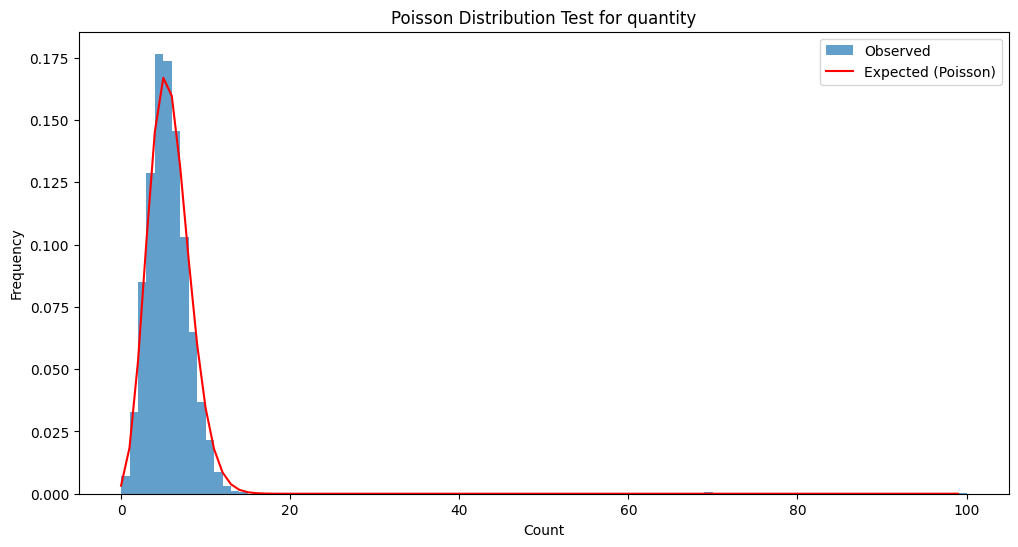

Poisson Distribution Test Results for quantity:
Mean (lambda): 5.74
Variance: 55.85
Variance-to-Mean Ratio (VMR): 9.73
Chi-square statistic: 90823744370372398705535338437438504592604129792890996922582093660709409532149760.00
p-value: 0.0000
The data does not follow a Poisson distribution (p < 0.05)


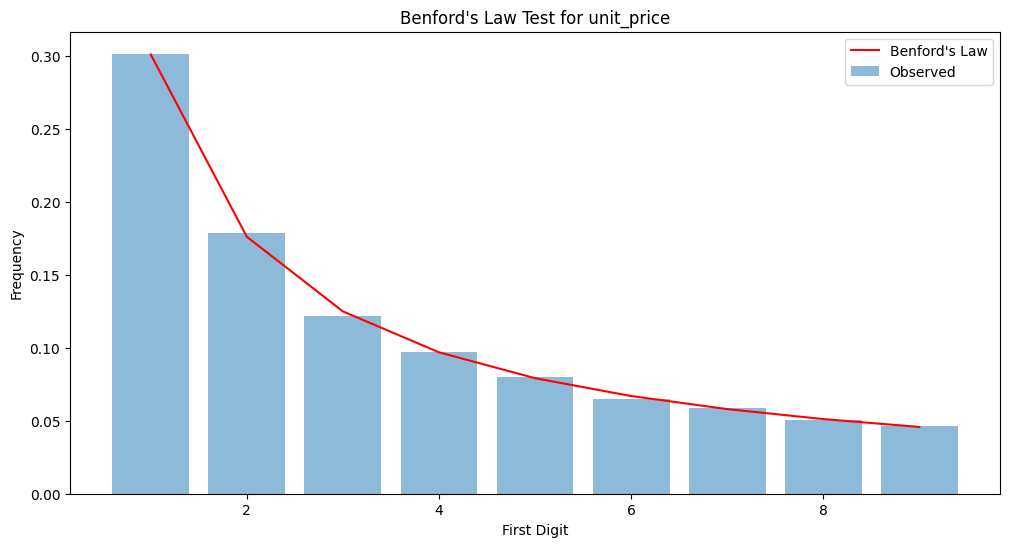

Benford's Law Test Results for unit_price:
Chi-square statistic: 2.35
p-value: 0.9684
The data follows Benford's Law (p >= 0.05)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_fake_sales_data(n_records=10000):
    np.random.seed(42)  # For reproducibility
    
    dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D').repeat(n_records//365)
    product_ids = np.random.randint(100, 1000, size=n_records)
    
    # Generate quantities with a mix of Poisson and some anomalies
    quantities = np.random.poisson(lam=5, size=n_records)
    quantities[:100] = np.random.randint(50, 100, size=100)  # Add some anomalies
    
    # Generate prices that somewhat follow Benford's Law
    prices = np.power(10, np.random.uniform(0, 5, size=n_records))
    prices = np.round(prices, 2)
    
    df = pd.DataFrame({
        # 'date': dates,
        'product_id': product_ids,
        'quantity': quantities,
        'unit_price': prices
    })
    
    return df

def test_poisson_distribution(data, column_name='quantity'):
    count_data = data[column_name]
    lambda_param = count_data.mean()
    
    x = np.arange(0, max(count_data) + 1)
    expected = stats.poisson.pmf(x, lambda_param) * len(count_data)
    observed = count_data.value_counts().sort_index().reindex(x, fill_value=0)
    
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    vmr = count_data.var() / count_data.mean()
    
    plt.figure(figsize=(12, 6))
    plt.hist(count_data, bins=range(0, max(count_data) + 2), density=True, alpha=0.7, label='Observed')
    plt.plot(x, stats.poisson.pmf(x, lambda_param), 'r-', label='Expected (Poisson)')
    plt.title(f"Poisson Distribution Test for {column_name}")
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    print(f"Poisson Distribution Test Results for {column_name}:")
    print(f"Mean (lambda): {lambda_param:.2f}")
    print(f"Variance: {count_data.var():.2f}")
    print(f"Variance-to-Mean Ratio (VMR): {vmr:.2f}")
    print(f"Chi-square statistic: {chi_square:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The data does not follow a Poisson distribution (p < 0.05)")
    else:
        print("The data follows a Poisson distribution (p >= 0.05)")

def test_benfords_law(data, column_name='unit_price'):
    first_digits = data[column_name].astype(str).str[0].astype(int)
    observed = first_digits.value_counts().sort_index()
    total_count = len(first_digits)
    
    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_count * expected_proportions
    
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    
    plt.figure(figsize=(12, 6))
    plt.bar(observed.index, observed / total_count, alpha=0.5, label='Observed')
    plt.plot(range(1, 10), expected_proportions, 'r-', label="Benford's Law")
    plt.title(f"Benford's Law Test for {column_name}")
    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    print(f"Benford's Law Test Results for {column_name}:")
    print(f"Chi-square statistic: {chi_square:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The data does not follow Benford's Law (p < 0.05)")
    else:
        print("The data follows Benford's Law (p >= 0.05)")

def main():
    # Generate fake sales data
    sales_data = generate_fake_sales_data()
    
    # Test Poisson distribution on quantity
    test_poisson_distribution(sales_data, 'quantity')
    
    # Test Benford's Law on unit price
    test_benfords_law(sales_data, 'unit_price')

if __name__ == "__main__":
    main()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_legitimate_sales_data(n_records=10000):
    np.random.seed(42)  # For reproducibility
    
    dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D').repeat(n_records//365)
    product_ids = np.random.randint(100, 1000, size=n_records)
    
    # Generate quantities with Poisson distribution
    quantities = np.random.poisson(lam=5, size=n_records)
    
    # Generate prices that mostly follow Benford's Law
    prices = np.power(10, np.random.uniform(0, 5, size=n_records))
    prices = np.round(prices, 2)
    
    df = pd.DataFrame({
        # 'date': dates,
        'product_id': product_ids,
        'quantity': quantities,
        'unit_price': prices
    })
    
    return df

def generate_fraudulent_sales_data(n_records=10000):
    np.random.seed(43)  # Different seed for variety
    
    dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D').repeat(n_records//365)
    product_ids = np.random.randint(100, 1000, size=n_records)
    
    # Generate quantities with artificial pattern
    quantities = np.random.randint(1, 10, size=n_records)  # More uniform distribution
    
    # Generate prices with manipulated first digits
    first_digits = np.random.choice([1, 2, 3, 4, 5], size=n_records, p=[0.3, 0.25, 0.2, 0.15, 0.1])
    remaining_digits = np.random.randint(0, 100, size=n_records)
    prices = first_digits * 100 + remaining_digits
    
    df = pd.DataFrame({
        # 'date': dates,
        'product_id': product_ids,
        'quantity': quantities,
        'unit_price': prices
    })
    
    return df

def test_poisson_distribution(data, column_name='quantity', title_suffix=''):
    count_data = data[column_name]
    lambda_param = count_data.mean()
    
    x = np.arange(0, max(count_data) + 1)
    expected = stats.poisson.pmf(x, lambda_param) * len(count_data)
    observed = count_data.value_counts().sort_index().reindex(x, fill_value=0)
    
    # Normalize expected frequencies to match the sum of observed frequencies
    expected = expected * (observed.sum() / expected.sum())
    
    # Ensure both arrays have the same length
    min_length = min(len(observed), len(expected))
    observed = observed[:min_length]
    expected = expected[:min_length]
    
    # Remove zeros from both arrays to avoid division by zero in chi-square test
    mask = (observed > 0) & (expected > 0)
    observed = observed[mask]
    expected = expected[mask]
    
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    vmr = count_data.var() / count_data.mean()
    
    plt.figure(figsize=(12, 6))
    plt.hist(count_data, bins=range(0, max(count_data) + 2), density=True, alpha=0.7, label='Observed')
    plt.plot(x, stats.poisson.pmf(x, lambda_param), 'r-', label='Expected (Poisson)')
    plt.title(f"Poisson Distribution Test for {column_name} {title_suffix}")
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    print(f"Poisson Distribution Test Results for {column_name} {title_suffix}:")
    print(f"Mean (lambda): {lambda_param:.2f}")
    print(f"Variance: {count_data.var():.2f}")
    print(f"Variance-to-Mean Ratio (VMR): {vmr:.2f}")
    print(f"Chi-square statistic: {chi_square:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The data does not follow a Poisson distribution (p < 0.05)")
    else:
        print("The data follows a Poisson distribution (p >= 0.05)")
    print("\n")

def test_benfords_law(data, column_name='unit_price', title_suffix=''):
    first_digits = data[column_name].astype(str).str[0].astype(int)
    observed = first_digits.value_counts().sort_index()
    total_count = len(first_digits)
    
    expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
    expected = total_count * expected_proportions
    
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    
    plt.figure(figsize=(12, 6))
    plt.bar(observed.index, observed / total_count, alpha=0.5, label='Observed')
    plt.plot(range(1, 10), expected_proportions, 'r-', label="Benford's Law")
    plt.title(f"Benford's Law Test for {column_name} {title_suffix}")
    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    print(f"Benford's Law Test Results for {column_name} {title_suffix}:")
    print(f"Chi-square statistic: {chi_square:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The data does not follow Benford's Law (p < 0.05)")
    else:
        print("The data follows Benford's Law (p >= 0.05)")
    print("\n")

def main():
    # Generate legitimate sales data
    legitimate_data = generate_legitimate_sales_data()
    
    # Generate fraudulent sales data
    fraudulent_data = generate_fraudulent_sales_data()
    
    # Test Poisson distribution on quantity
    test_poisson_distribution(legitimate_data, 'quantity', '(Legitimate Data)')
    test_poisson_distribution(fraudulent_data, 'quantity', '(Fraudulent Data)')
    
    # Test Benford's Law on unit price
    test_benfords_law(legitimate_data, 'unit_price', '(Legitimate Data)')
    test_benfords_law(fraudulent_data, 'unit_price', '(Fraudulent Data)')

if __name__ == "__main__":
    main()

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0001674857876431923